In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

(0.0, 1.5)

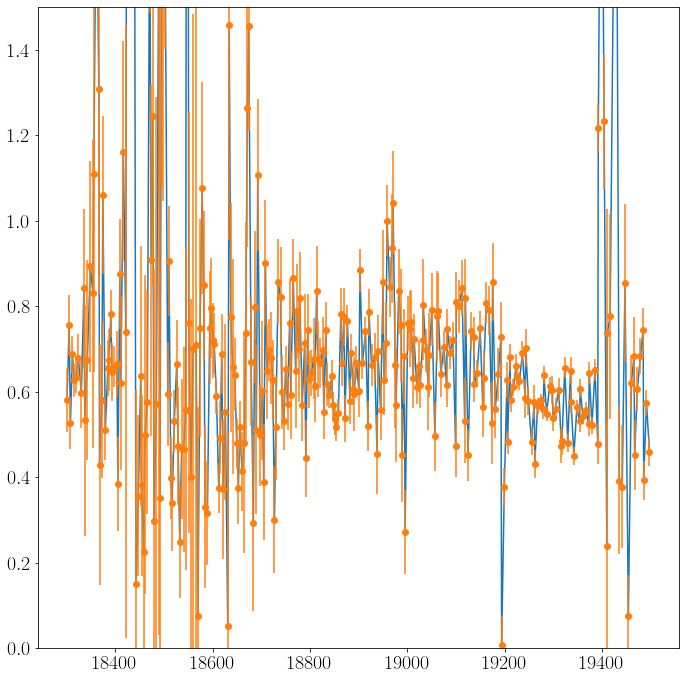

In [51]:
ax = Spec1.plot_line_region(18300, 19500)
ax.set_ylim(0, 1.5)

In [48]:
20581 * ((1-26500/300000)/(1+26500/300000))**.5

18836.64465960324

## He I 10830

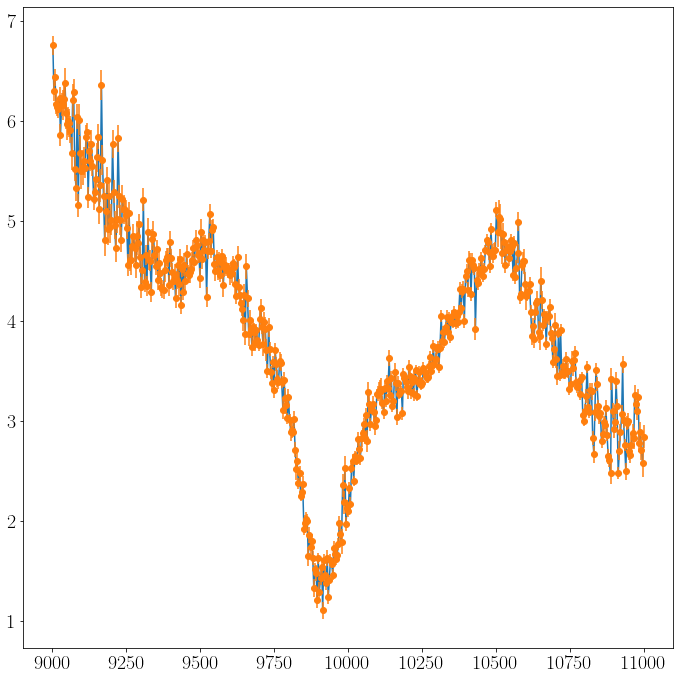

In [3]:
Spec1.plot_line_region(9000, 11000)

## He hvf + Fe II pvf

### Single Fe II line (10500)

In [165]:
Spec1.add_line('HeI_10830/FeII1',
               9450,
               10500,
               lines=[[10830], [10500]],
               rel_strength=[[], []])
Spec1.line['HeI_10830/FeII1'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                  -8000, 14, -2000))

281 points within 9450.00 and 10500.00 angstroms.
LS estimation:
Velocity 1: -26300 km/s
Velocity 2: -7767 km/s


Normalize factor = 2.295


100%|███████████████████████████████████████| 2000/2000 [00:21<00:00, 93.67it/s]


MCMC results:
Velocity 1: -26307 pm 48 km/s
Velocity 2: -7768 pm 122 km/s
Normalize factor = 2.298


  8%|███                                   | 4000/50000 [00:42<08:13, 93.19it/s]

MCMC results:
Velocity 1: -26305 pm 52 km/s
Velocity 2: -7776 pm 129 km/s


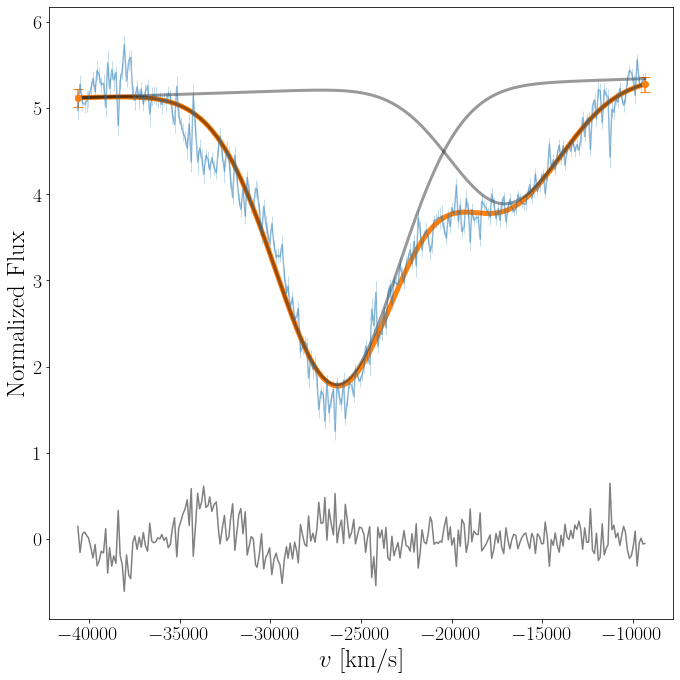

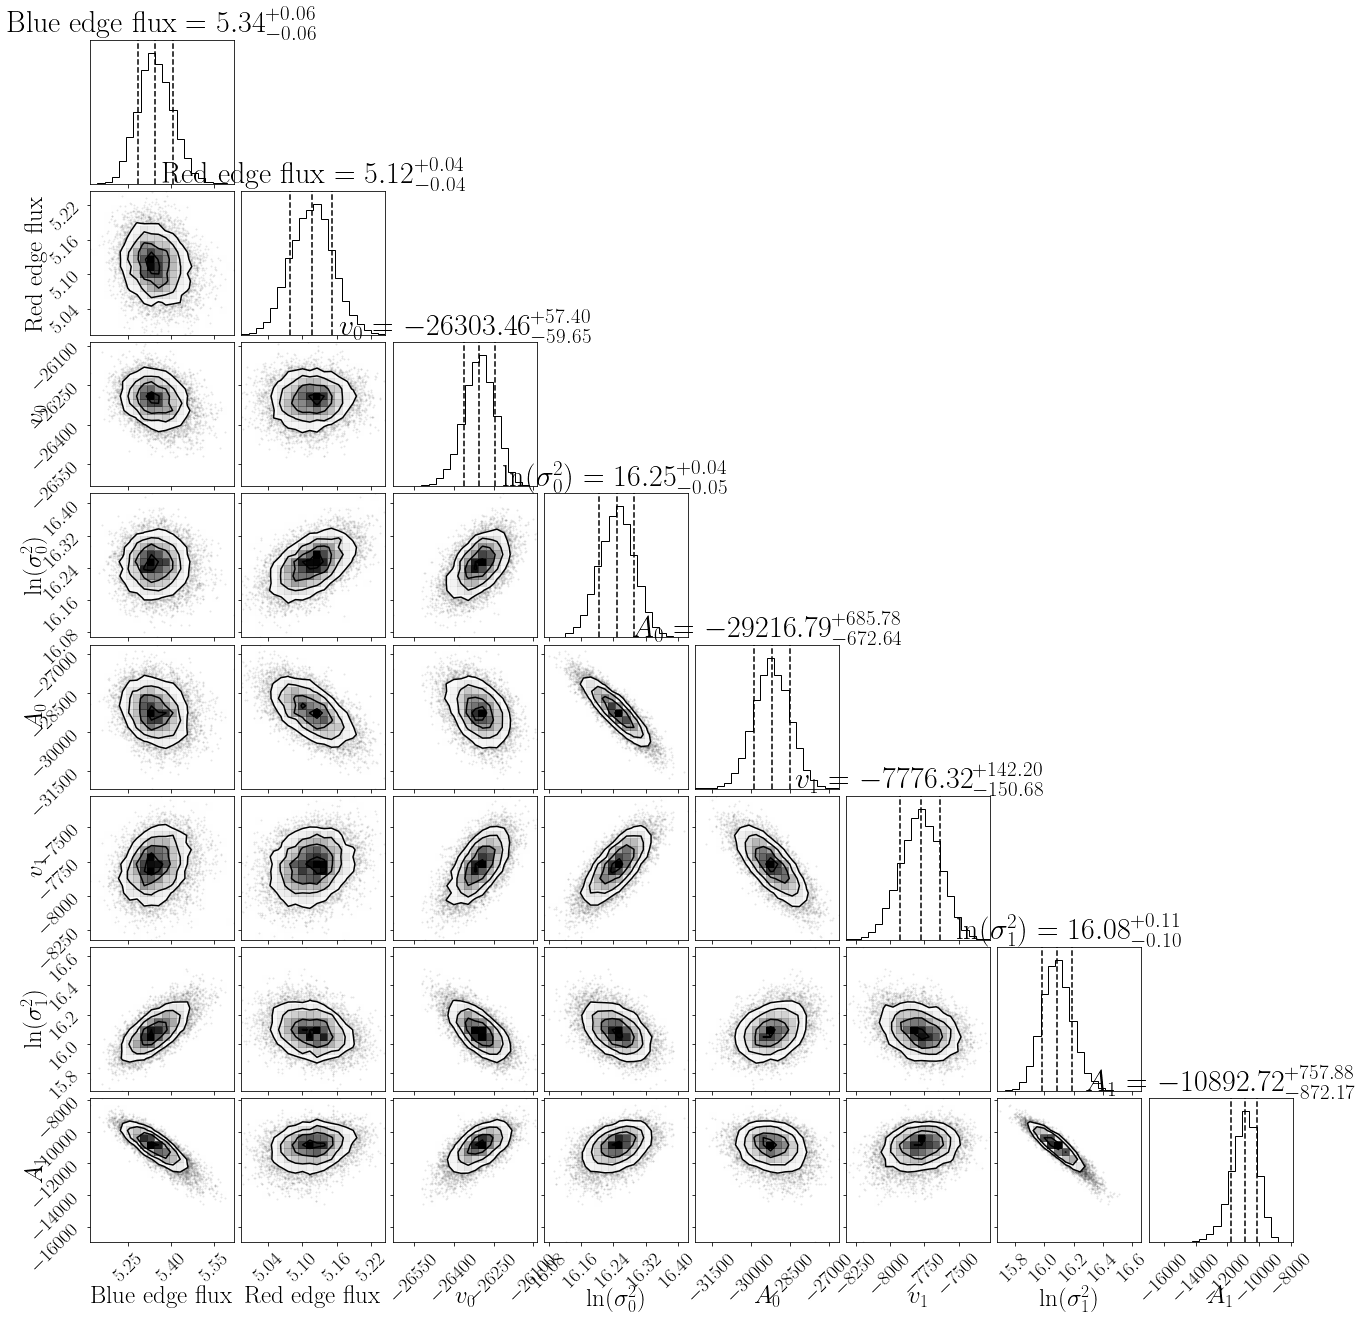

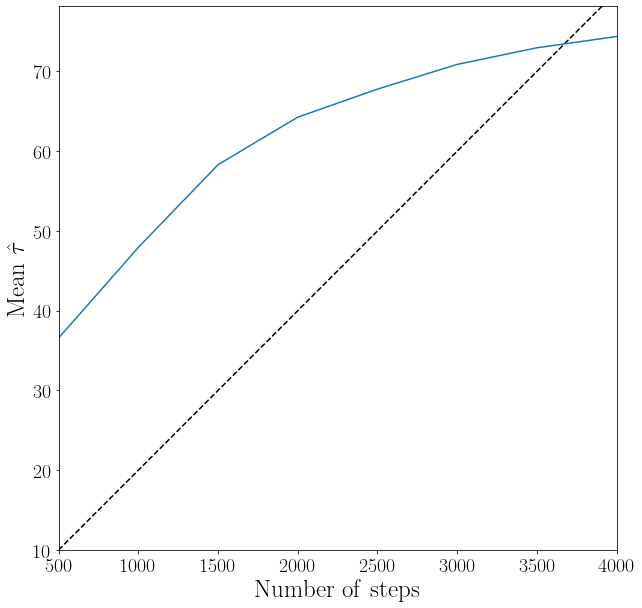

In [166]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII1'].theta_LS,#[1, 1, -26000, 16, -5000, -8000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=2000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[-26000, -8000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII1'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Two Fe II lines

In [167]:
Spec1.add_line('HeI_10830/FeII2',
               9450,
               10500,
               lines=[[10830], [9998, 10500]],
               rel_strength=[[], [.5, 1]],
               free_rel_strength=[False, True])
               #rel_strength=[[], [0.832, 0.521]])
Spec1.line['HeI_10830/FeII2'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                 -8000, 14, -2000))

281 points within 9450.00 and 10500.00 angstroms.
LS estimation:
Velocity 1: -23226 km/s
Velocity 2: -17341 km/s


Normalize factor = 2.026


100%|███████████████████████████████████████| 5000/5000 [01:01<00:00, 81.96it/s]

MCMC results:
Velocity 1: -26120 pm 53 km/s
Velocity 2: -8350 pm 108 km/s


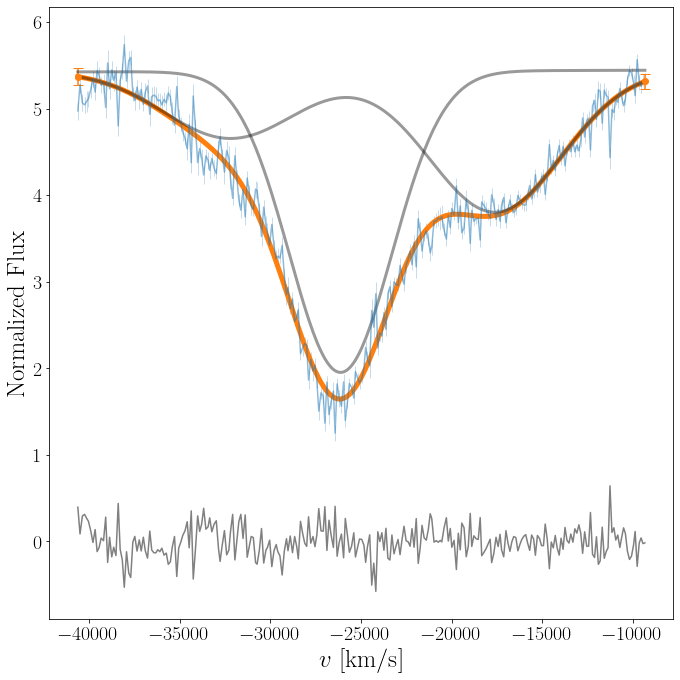

Normalize factor = 1.950


 11%|████▏                                 | 5500/50000 [01:07<09:07, 81.34it/s]

MCMC results:
Velocity 1: -26145 pm 54 km/s
Velocity 2: -8420 pm 111 km/s


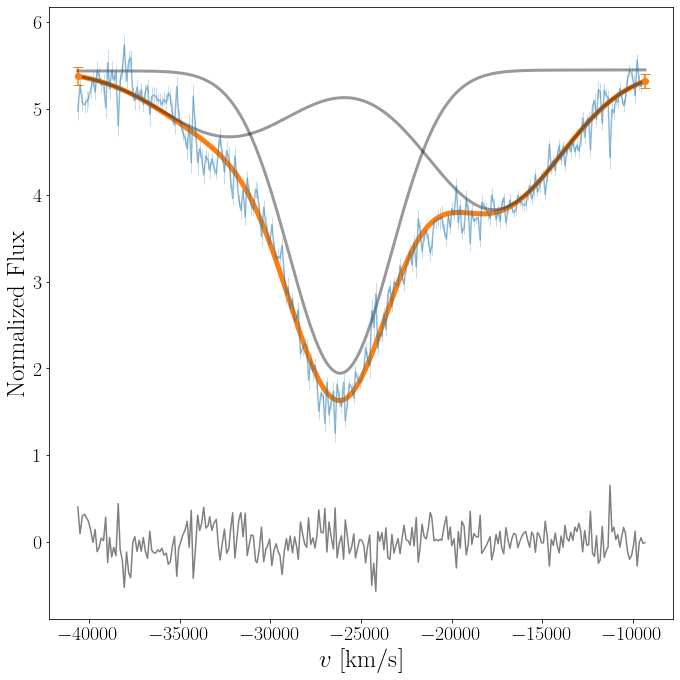

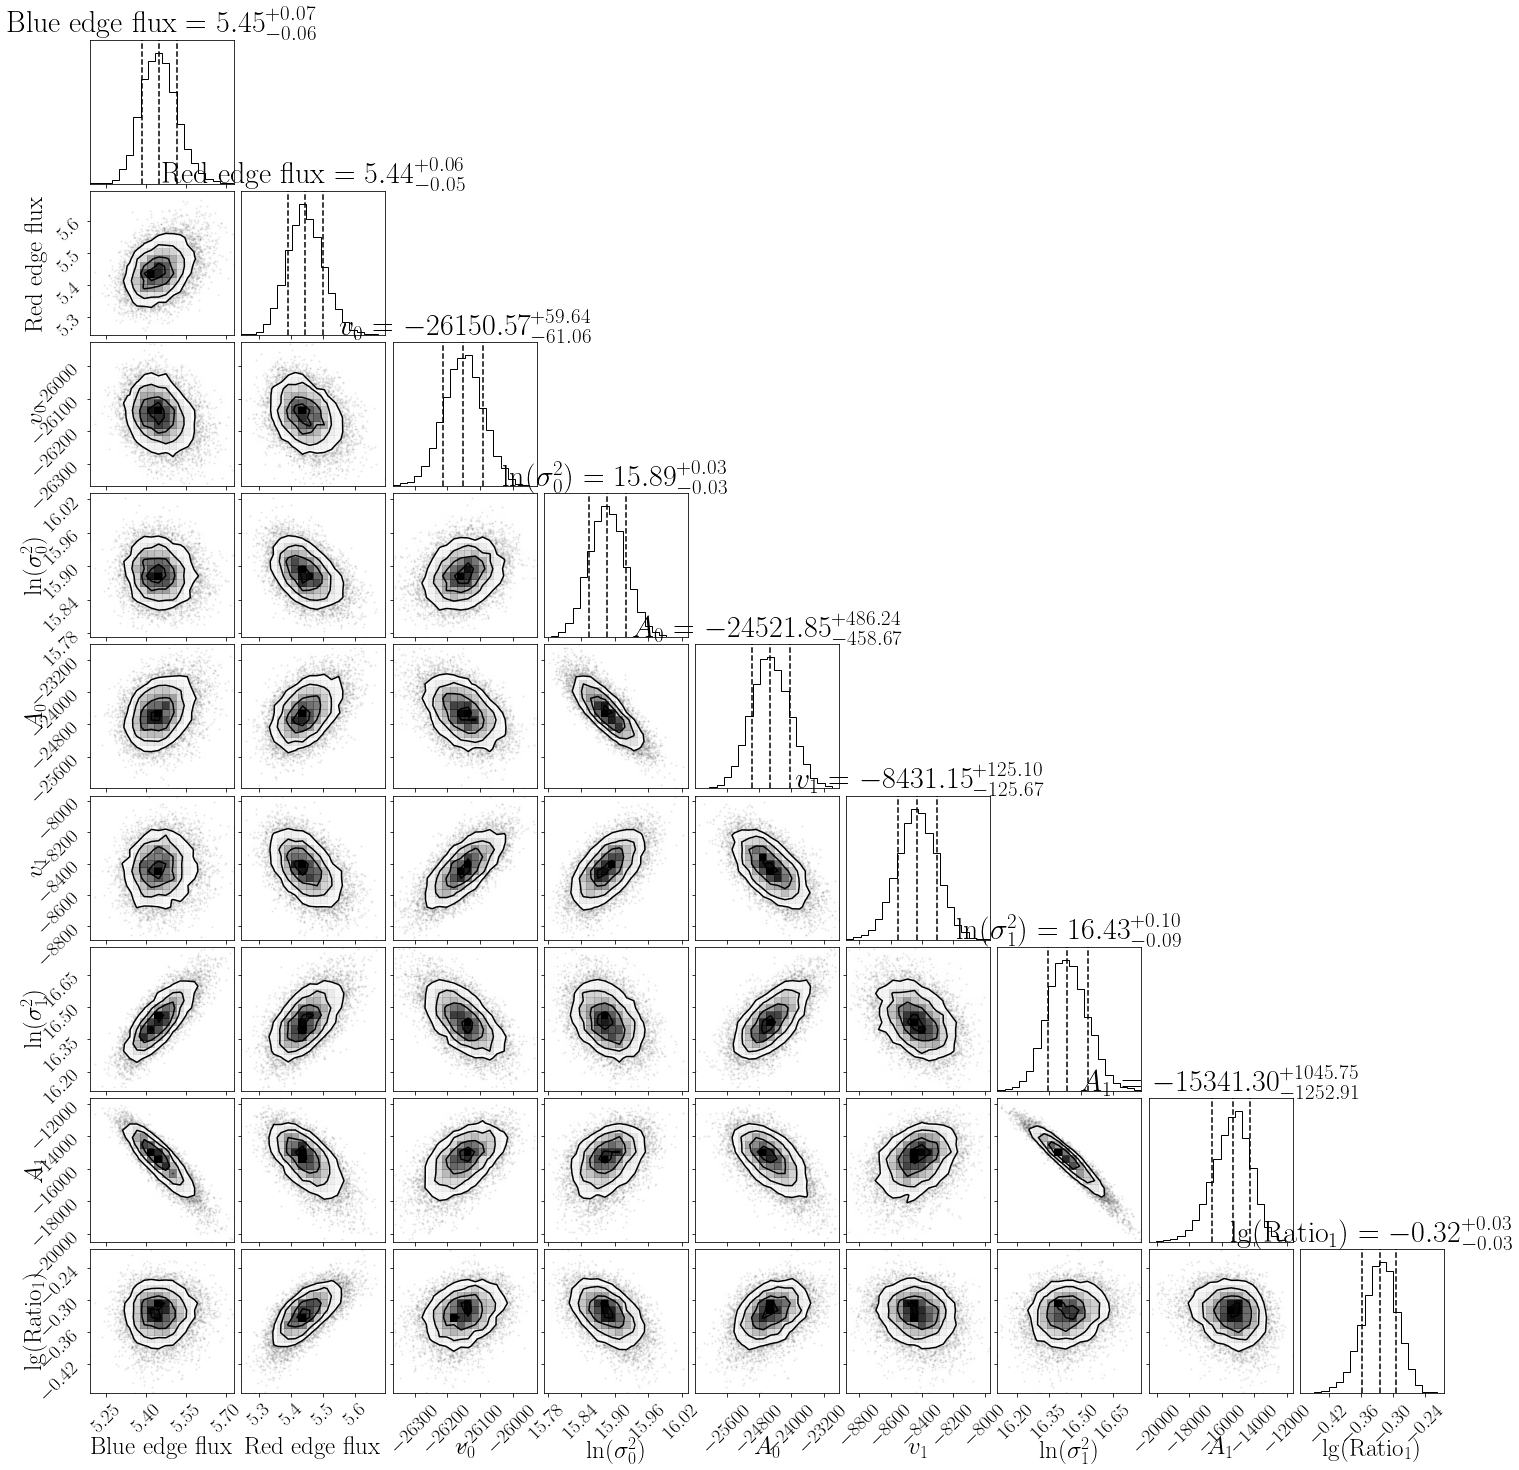

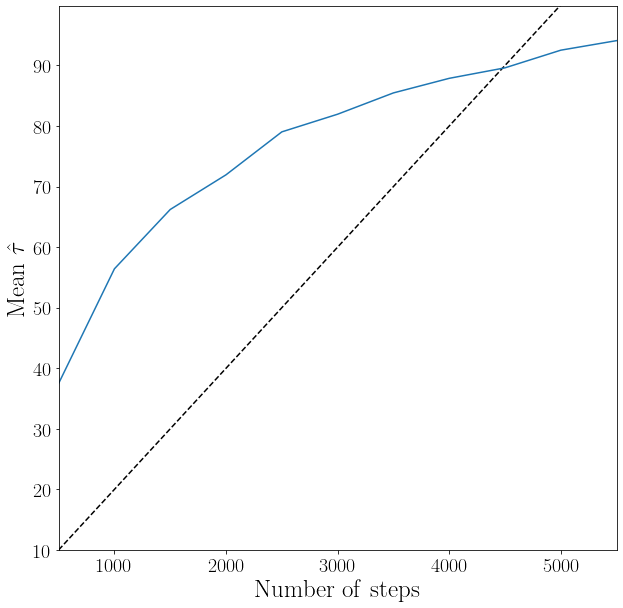

In [168]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e5],
    var_max=1e10,
    initial=[5, 5, -28000, 15, -2000, -8000, 14, -2000],
    normalize_unc='LS',
    max_nsteps=5000,
    Plot_model=True)
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC[:8],
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Three Fe II lines

In [ ]:
Spec1.add_line('HeI_10830/FeII3',
               9300,
               10600,
               lines=[[10830], [9998, 10500, 10863]],
               rel_strength=[[], [1, 1.5, 1]])
               #rel_strength=[[], [0.832, 0.521, 0.374]])

In [ ]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC,
    normalize_unc='LS',
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII3'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## He I hvf + He I pvf

In [ ]:
Spec1.add_line('HeI_10830/HeI_10830',
               9500,
               10500,
               lines=[[10830], [10830]],
               rel_strength=[[1], [1]])
Spec1.line['HeI_10830/HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

In [ ]:
mu1 = -26000
mu2 = -17000
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -17000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[-26000, -18000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/HeI_10830'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## C I 10693

In [26]:
vel.velocity_rf_line(10830, 10693, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-22196.253385658998

## Mg II 10927

In [25]:
vel.velocity_rf_line(10830, 10927, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-28639.093563225262

## Si I 10585 & 10827

In [30]:
vel.velocity_rf_line(10830, 10585, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-19167.445329517992

In [31]:
vel.velocity_rf_line(10830, 10827, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-25905.698224021242

214 points within 9500.00 and 10300.00 angstroms.


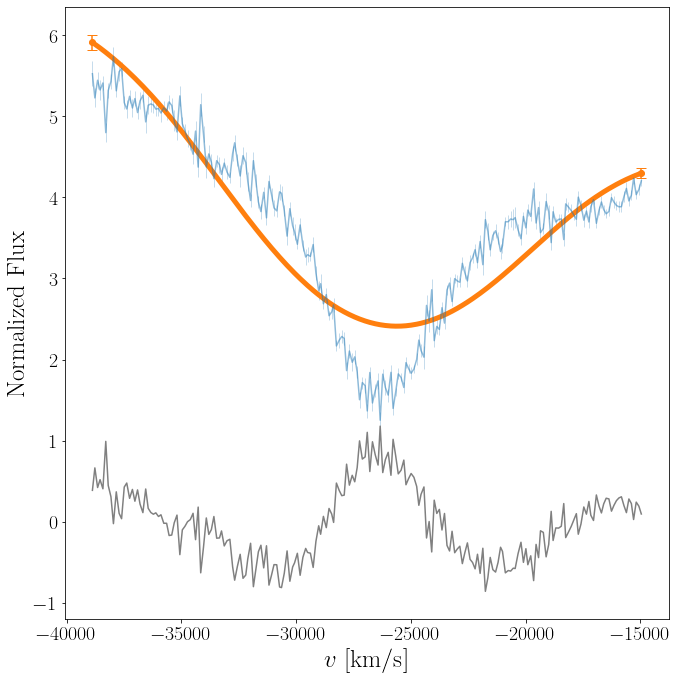

LS estimation:
Velocity 1: -23190 km/s


In [29]:
Spec1.add_line('SiI_10585/10827',
               9500,
               10300,
               lines=[[10585, 10827]],
               rel_strength=[[1, 1]])
Spec1.line['SiI_10585/10827'].LS_estimator(guess=(1, 1, -10000, 15, -2000), plot_model=True)